# Cat - Dog classification using CNN

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

training_set = train_datagen.flow_from_directory('CNN_Dataset/train/',
                                                 target_size = (150, 150),
                                                 batch_size = 32,
                                                 class_mode='binary'
                                                )




Found 8000 images belonging to 2 classes.


(1, 150, 150, 3)


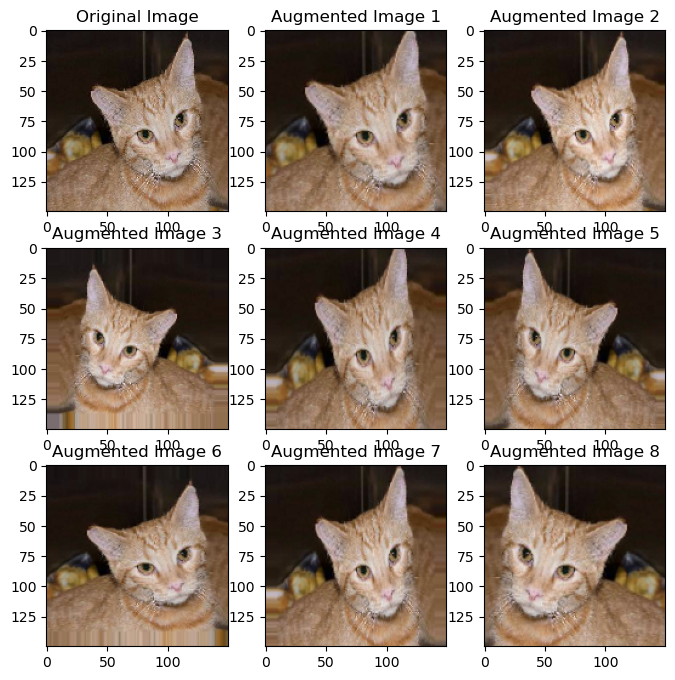

In [3]:
# Load a test image for visualization purposes
test_image = np.random.rand(150, 150, 3)

# Choose an image from the training set
img_path = 'CNN_Dataset/train/cat/cat.14.jpg'

# Load and display the original image
img = image.load_img(img_path, target_size=(150, 150))
plt.figure(figsize=(8, 8))
plt.subplot(3, 3, 1)
plt.imshow(img)
plt.title('Original Image')

# Reshape the image to (1, height, width, channels) for flow method
#  The flow method expects input data in the form of a 4D tensor, where the first dimension represents the batch size.
img = image.img_to_array(img)
img = img.reshape((1,) + img.shape)
print(img.shape)

# Generate augmented images and display them
i = 2
for batch in train_datagen.flow(img, batch_size=1):
    plt.subplot(3, 3, i)
    plt.imshow(image.array_to_img(batch[0]))
    plt.title('Augmented Image {}'.format(i-1))
    i += 1
    if i > 9:
        break  # Break after displaying 8 augmented images

plt.show()

In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(directory="CNN_Dataset/test/",
                                            target_size = (150, 150),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam

IMAGE_WIDTH=150
IMAGE_HEIGHT=150
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3 # 3 for Colored Images and 1 for Grayscale Images
BATCH_SIZE=32
EPOCHS= 20


model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),name='Conv1'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), name='Pool1'))


model.add(Conv2D(64, (3, 3), activation='relu', name='Conv2'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),name='Pool2'))

model.add(Conv2D(64, (3, 3), activation='relu', name='Conv3'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),name='Pool3'))

model.add(Conv2D(64, (3, 3), activation='relu', name='Conv4'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),name='Pool4'))

# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(0.001)

model.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1 (Conv2D)              (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 148, 148, 32)      128       
 Normalization)                                                  
                                                                 
 Pool1 (MaxPooling2D)        (None, 74, 74, 32)        0         
                                                                 
 Conv2 (Conv2D)              (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 72, 72, 64)        256       
 chNormalization)                                                
                                                                 
 Pool2 (MaxPooling2D)        (None, 36, 36, 64)       

In [6]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau



earlystop = EarlyStopping(patience=10) # Number of epochs with no improvement after which training will be stopped.
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=2, #If the 'val_accuracy' does not improve for 2 consecutive epochs (patience=2), the learning rate will be reduced
                                            verbose=1,
                                            factor=0.1,
                                            min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]

In [7]:
%%time
# running time
hist = model.fit(training_set,
    epochs=EPOCHS,
    validation_data= test_set,
    callbacks=callbacks
)

Epoch 1/20


250/250 [==============================] - 378s 1s/step - loss: 0.7140 - accuracy: 0.6348 - val_loss: 0.8524 - val_accuracy: 0.5590 - lr: 0.0010
Epoch 2/20
250/250 [==============================] - 238s 952ms/step - loss: 0.5702 - accuracy: 0.7135 - val_loss: 0.7888 - val_accuracy: 0.6495 - lr: 0.0010
Epoch 3/20
250/250 [==============================] - 249s 994ms/step - loss: 0.5022 - accuracy: 0.7586 - val_loss: 0.4863 - val_accuracy: 0.7655 - lr: 0.0010
Epoch 4/20
250/250 [==============================] - 248s 990ms/step - loss: 0.4551 - accuracy: 0.7861 - val_loss: 0.5394 - val_accuracy: 0.7545 - lr: 0.0010
Epoch 5/20
250/250 [==============================] - 238s 952ms/step - loss: 0.4142 - accuracy: 0.8133 - val_loss: 0.4253 - val_accuracy: 0.8300 - lr: 0.0010
Epoch 6/20
250/250 [==============================] - 238s 951ms/step - loss: 0.3640 - accuracy: 0.8374 - val_loss: 0.4593 - val_accuracy: 0.7880 - lr: 0.0010
Epoch 7/20
250/250 [===========================

In [11]:
model.save('cat_dog_model.hd5')

INFO:tensorflow:Assets written to: cat_dog_model.hd5\assets


INFO:tensorflow:Assets written to: cat_dog_model.hd5\assets


In [8]:
model.save('my_model.keras')

In [9]:
results = model.evaluate(test_set)

# Print the evaluation results
print("Loss:", results[0])
print("Accuracy:", results[1])

63/63 [==============================] - 11s 181ms/step - loss: 0.3136 - accuracy: 0.8925
Loss: 0.31361082196235657
Accuracy: 0.8924999833106995


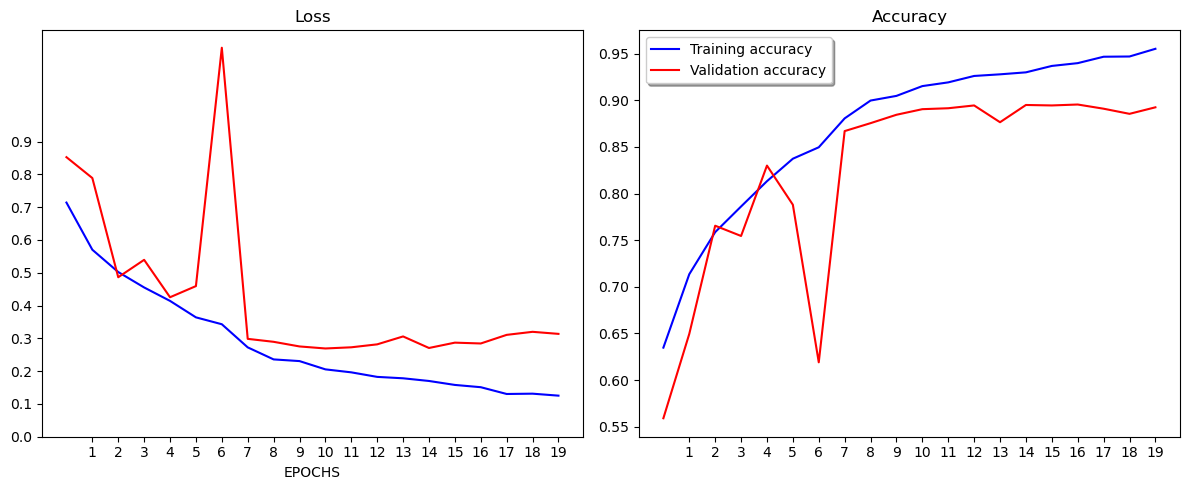

In [10]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(hist.history['loss'], color='b', label="Training loss")
ax1.plot(hist.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, EPOCHS, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))
ax1.set_xlabel("EPOCHS")
ax1.set_title("Loss")

ax2.plot(hist.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, EPOCHS, 1))
ax1.set_xlabel("EPOCHS")
ax2.set_title("Accuracy")

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [ ]:
!pip3 install pydot
!pip3 install graphviz
!conda install graphviz

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(
    model,
    show_shapes=True,
    show_dtype=True,
    show_layer_activations=True
)

# Testing with new data

In [ ]:
import numpy as np
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.models import load_model

test_image = load_img('CNN_Dataset/prediction/img1.jpg', target_size = (150, 150))
cnn_model = load_model('my_model.keras')

In [ ]:
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn_model.predict(test_image)

In [ ]:
training_set.class_indices

In [ ]:
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

print(prediction)